In [3]:
#Program 10 - Creating & Evaluating new features

In [4]:
#importing pandas library
import pandas as pd

#importing data into a dataframe
Data = pd.read_csv("E:/Training/Certifications - LinkedIn/NLP with Python for Machine Learning Essential Training/Dataset/SMSSpamCollection.tsv",sep="\t",header=None,names=["Label","Text"])

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
8,ham,I'm gonna be home soon and i don't want to tal...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [5]:
#creating additional feature 1 - length of text message (assumption: length of messages labelled as spam is more than length of messages labelled as ham)
#This is done by applying len() on each text messages and excluding number of white spaces from length using count()

In [6]:
#calculating total number of characters (excluding white spaces) in a text message
Data["Text_Length"] = Data["Text"].apply(lambda x: len(x) - x.count(" "))

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text,Text_Length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135
6,spam,WINNER!! As a valued network customer you have...,132
7,spam,Had your mobile 11 months or more? U R entitle...,126
8,ham,I'm gonna be home soon and i don't want to tal...,89
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111


In [7]:
#creating additional feature 2 - percent of punctuation in text message (assumption: percent of punctuation in messages labelled as spam is more than percent of punctuation in messages labelled as ham)
#This is done by adding 1 for each character in text message which is also a punctuation, then counting total number of 1's using sum()
#Next calculating percent of punctuation by dividing the total number of punctuations by total number of characters in a text message (excluding white spaces), then rounding decimal point upto 3 spaces and multiplying by 100 to get % value

In [8]:
#importing string package
import string

#creating a function to calculate the percent of punctuation in a text message
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

#applying the method
Data["Text_Punct%"] = Data["Text"].apply(lambda x: punct_count(x))

#displaying first 10 entries of the dataframe
Data.head(10)

,Label,Text,Text_Length,Text_Punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4
6,spam,WINNER!! As a valued network customer you have...,132,4.5
7,spam,Had your mobile 11 months or more? U R entitle...,126,1.6
8,ham,I'm gonna be home soon and i don't want to tal...,89,6.7
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111,7.2


In [9]:
#evaluating newly created features

In [10]:
#importing pyplot package of matplotlib library
from matplotlib import pyplot

#importing numpy library
import numpy as np

%matplotlib inline

D:\anaconda-software\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
D:\anaconda-software\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


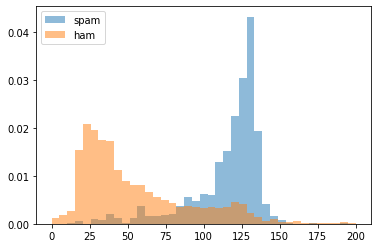

In [22]:
#plotting histogram to visualize if newly created feature 1 - text length is important and corelated to our dataset

#bins are defined with starting point of interval, ending point of interval and number of samples
bins = np.linspace(0,200,40)

#bins are defined as containers (i.e any text message with length between 0 and 25 (since cut-points are 40) will be showed in bin 1 and so on)
#alpha is defined for shading of the histogram
#normed is set as true as normalization is needed since number of ham text messages is way more than spam text messages
#label is defined to give info regarding the histogram
#legend defines the location for the label 

#considering rows only with label ~ spam for the column ~ length
pyplot.hist(Data[Data['Label']=="spam"]['Text_Length'], bins, alpha=0.5,normed=True,label='spam')
#considering rows only with label ~ ham for the column ~ length
pyplot.hist(Data[Data['Label']=="ham"]['Text_Length'], bins, alpha=0.5,normed=True,label='ham')

pyplot.legend(loc='upper left')
pyplot.show()

D:\anaconda-software\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
D:\anaconda-software\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


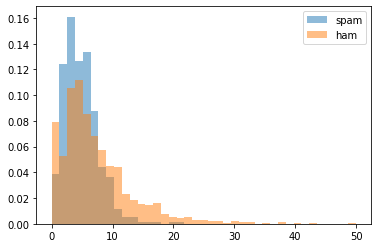

In [12]:
#plotting histogram to visualize if newly created feature 2 - text punctuation % is important and corelated to our dataset

#bins are defined with starting point of interval, ending point of interval and number of samples
bins = np.linspace(0,50,40)

#bins are defined as containers (i.e any text message with percent of punctuation between 0 and 10 (since cut-points are 40) will be showed in bin 1 and so on)
#alpha is defined for shading of the histogram
#normed is set as true as normalization is needed since number of ham text messages is way more than spam text messages
#label is defined to give info regarding the histogram
#legend defines the location for the label 

#considering rows only with label ~ spam for the column ~ length
pyplot.hist(Data[Data['Label']=="spam"]['Text_Punct%'], bins, alpha=0.5,normed=True,label='spam')
#considering rows only with label ~ ham for the column ~ length
pyplot.hist(Data[Data['Label']=="ham"]['Text_Punct%'], bins, alpha=0.5,normed=True,label='ham')

pyplot.legend(loc='upper right')
pyplot.show()

In [13]:
#Conclusion: Feature 1 i.e. text length can be considered as one of the important features for modelling but Feature 2 may or may not provide value while modelling